<a href="https://colab.research.google.com/github/franfram/AAR-DL/blob/main/Sheep_decoder_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install pydot graphviz

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import plot_model

from tensorflow.keras import layers
from tensorflow.keras.models import Model





In [11]:
# @title Generate data for testing

def generate_data_cnn(nsamples = 1000, nclasses = 3, nfeatures = 8):
    # Parameters
    num_samples = 1000  # Number of data segments
    time_steps = 5120
    num_features = 8
    num_classes = 3

    # Generate synthetic data
    X = np.random.randn(nsamples, time_steps, nfeatures)

    # Generate random behavior labels
    y = np.random.randint(nclasses, size=nsamples)

    # Convert y to one-hot encoding
    y_one_hot = np.eye(num_classes)[y]

    return X, y_one_hot



x_train_cnn, y_train_cnn = generate_data_cnn(nsamples = 1000, nclasses = 3, nfeatures = 8)


(1000, 3)

# Convolutional Neural Network

In [5]:
# @title Define CNN model
def define_cnn():
    # start model
    model = Sequential()

    # Initial layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(5120, 8)))
    model.add(MaxPooling1D(pool_size=2))

    for _ in range(7):
      model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
      model.add(MaxPooling1D(pool_size=2))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    # Output layer - 3 neurons for the 3 classes (Walking, Eating, Resting)
    model.add(Dense(3, activation='softmax'))

    return model


model1 = define_cnn()

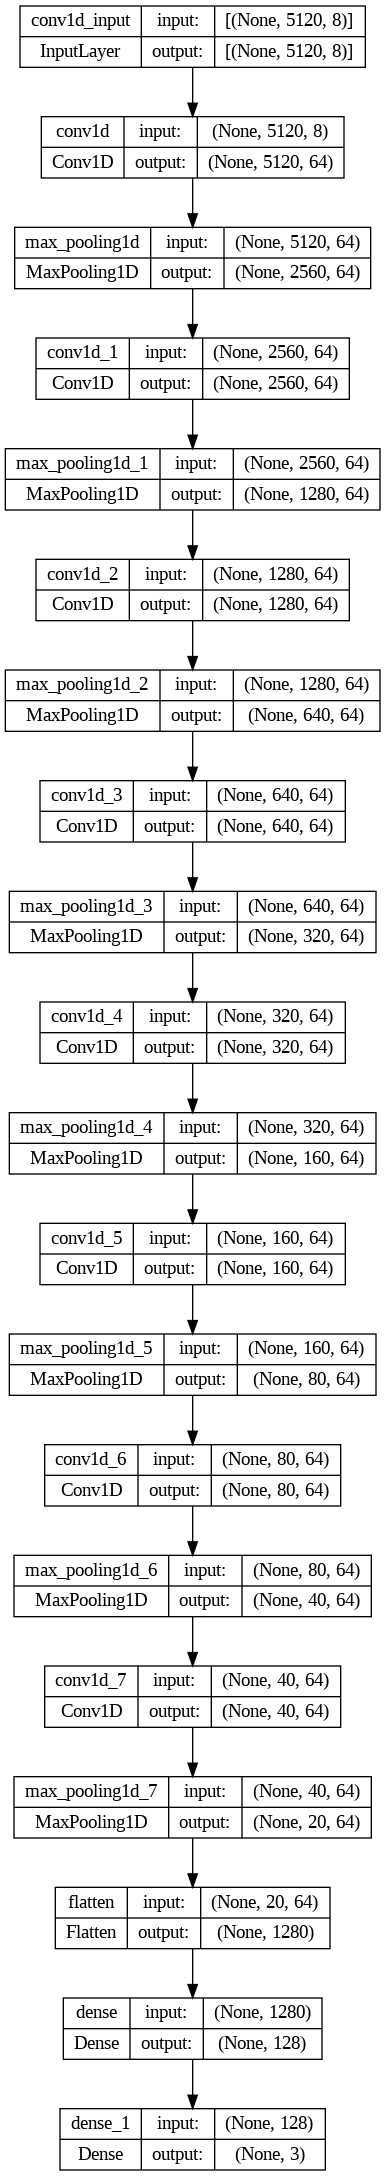

In [ ]:
# Also check this for visualizing: http://alexlenail.me/NN-SVG/index.html
plot_model(model1, show_shapes=True, show_layer_names=True)

In [6]:
# @title Compile and fit the CNN

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

fit1 = model1.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
 1/25 [>.............................] - ETA: 1:32 - loss: 1.0958 - accuracy: 0.3750

KeyboardInterrupt: ignored

In [7]:
# @title Default title text
model1.summary(), fit1.history, fit1.params

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5120, 64)          1600      
                                                                 
 max_pooling1d (MaxPooling1  (None, 2560, 64)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2560, 64)          12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1280, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 1280, 64)          12352     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 640, 64)           0

NameError: ignored

# CNN + Transformer

In [8]:
def define_convTransformer():

    input_shape = (5120, 8)

    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # CNN layers
    x = layers.Conv1D(64, 3, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling1D(2)(x)

    for _ in range(7):
      x = layers.Conv1D(64, 3, padding='same', activation='relu')(x)
      x = layers.MaxPooling1D(2)(x)


    # Transformer layers
    # x = layers.Reshape((20, 64))(x)

    # Multi-Head Self Attention layer
    query_value_attention_seq = layers.MultiHeadAttention(num_heads=2, key_dim=2)(x, x)

    # Adding the self attetion to the original sequence
    x = layers.Add()([x, query_value_attention_seq])

    # Layer Normalization
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Position-wise Feed-Forward Part
    x = layers.Conv1D(filters=128, kernel_size=1, activation='relu')(x)
    x = layers.Conv1D(filters=64, kernel_size=1, activation='relu')(x)

    # Adding the position-wise feedforward to the sequence
    x = layers.Add()([x, query_value_attention_seq])

    # Layer Normalization
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Global Average Pooling to reduce the spatial dimensions
    x = layers.GlobalAveragePooling1D()(x)

    # Dense layers for final classification
    x = layers.Dense(20, activation='relu')(x)
    outputs = layers.Dense(3, activation='softmax')(x)

    # Creating the model
    model2 = Model(inputs=inputs, outputs=outputs)

    return model2


model2 = define_convTransformer()

In [ ]:
plot_model(model2, show_shapes=True, show_layer_names=True)

In [9]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
fit2 = model2.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=1,#10,
    validation_split=0.2
)

25/25 [==============================] - 22s 695ms/step - loss: 1.1413 - accuracy: 0.3575 - val_loss: 1.1058 - val_accuracy: 0.2850


In [ ]:
fit2.history, fit2.params

({'loss': [1.131862759590149,
   1.109942078590393,
   1.1113086938858032,
   1.1156115531921387,
   1.1045825481414795,
   1.1106511354446411,
   1.1172391176223755,
   1.1009087562561035,
   1.113114356994629,
   1.1075762510299683],
  'accuracy': [0.3675000071525574,
   0.32624998688697815,
   0.33000001311302185,
   0.33125001192092896,
   0.3462499976158142,
   0.33125001192092896,
   0.32249999046325684,
   0.36000001430511475,
   0.3387500047683716,
   0.33375000953674316],
  'val_loss': [1.1097511053085327,
   1.1460716724395752,
   1.1076767444610596,
   1.112754225730896,
   1.1015105247497559,
   1.102964997291565,
   1.099985122680664,
   1.102810025215149,
   1.0957796573638916,
   1.101040005683899],
  'val_accuracy': [0.3050000071525574,
   0.3050000071525574,
   0.3050000071525574,
   0.3700000047683716,
   0.3149999976158142,
   0.3700000047683716,
   0.3700000047683716,
   0.3700000047683716,
   0.3700000047683716,
   0.32499998807907104]},
 {'verbose': 1, 'epochs': 1